# Part 3: Practical applications of the FFT in Python

## Frequency domain filtering

Images will often contain unwanted components at certain ranges of frequencies. These can often be removed by filtering operations performed in the frequency domain. Filters typicall fall into three classes:
1. Low-pass filters: Remove high frequency components of the signal.
2. High-pass filters: Remove low frequency components of the signal.
3. Band-pass filters: Remove frequencies outside of a specified continuous range of frequencies.

Lets take a look at the application of these three filter types:

In [25]:
from skimage.data import camera
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift

import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-colorblind')
font = {'size': 18}

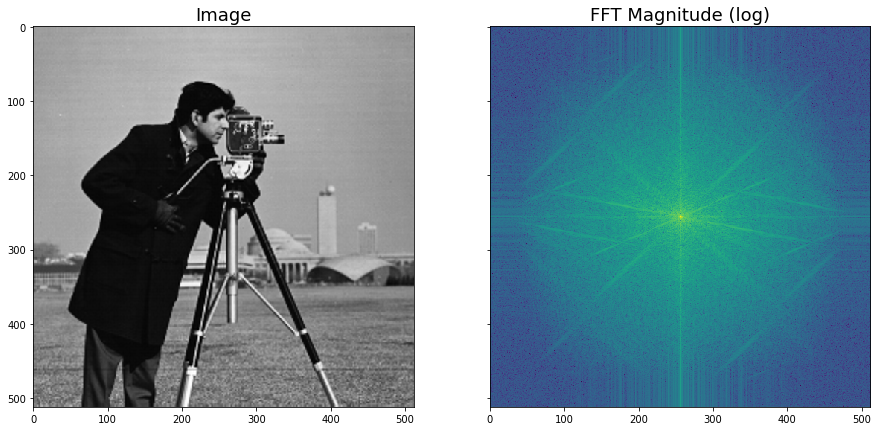

In [26]:
# First look at Image and corresponding FFT

image = camera()
image_fft = fftshift(fftn(image))

# Plot
fig, ax = plt.subplots(ncols=2, figsize=(15, 10), sharey=True)
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image', fontdict=font)
ax[1].imshow(np.log(np.abs(image_fft))) # Notice the log transform!
ax[1].set_title('FFT Magnitude (log)', fontdict=font);

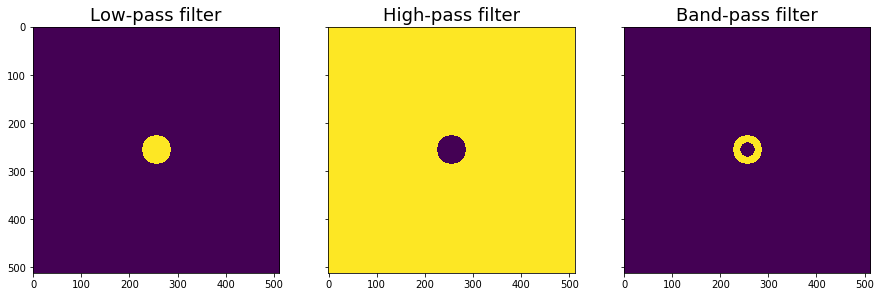

In [60]:
# Create some filters and plot them

from skimage.draw import circle

cutoff = 30 # Play with this value
center = (np.array(image.shape)[:2] / 2) - 0.5

# Low-pass filter
lpf = np.zeros_like(image)
lpf[circle(*center, cutoff)] = 1

# High-pass filter
hpf = np.ones_like(image)
hpf[circle(*center, cutoff)] = 0

# Band-pass filter
bpf = lpf.copy()
bpf[circle(*center, cutoff / 2)] = 0

# Plot
fig, ax = plt.subplots(ncols=3, figsize=(15, 10), sharey=True)
ax[0].imshow(lpf)
ax[0].set_title('Low-pass filter', fontdict=font)
ax[1].imshow(hpf)
ax[1].set_title('High-pass filter', fontdict=font)
ax[2].imshow(bpf)
ax[2].set_title('Band-pass filter', fontdict=font);

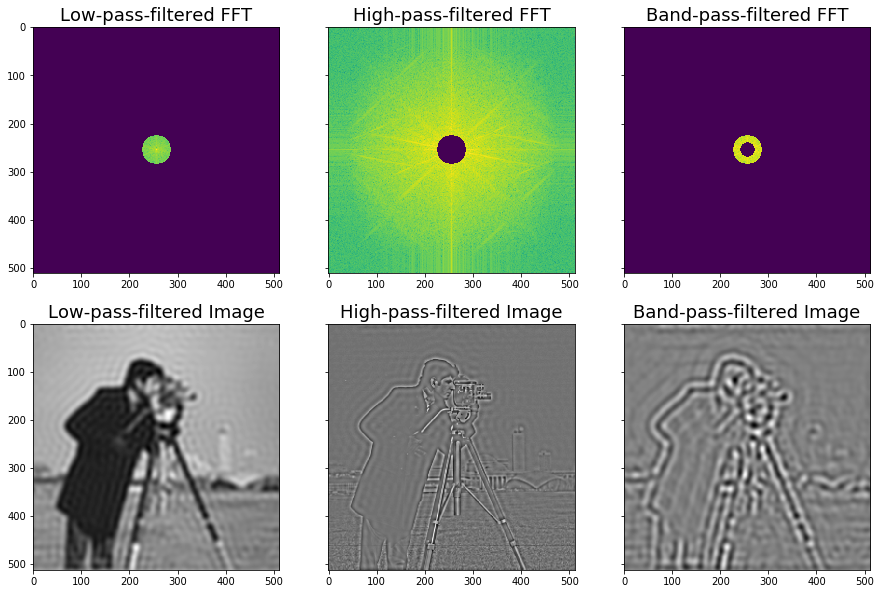

In [84]:
# Apply filters to the FFT
lp_filtered_fft = image_fft * lpf
hp_filtered_fft = image_fft * hpf
bp_filtered_fft = image_fft * bpf

# convert back to spatial domain from frequency domain
lp_filtered_image = ifftn(ifftshift(lp_filtered_fft))
hp_filtered_image = ifftn(ifftshift(hp_filtered_fft))
bp_filtered_image = ifftn(ifftshift(bp_filtered_fft))

lp_filtered_image = lp_filtered_image.real
hp_filtered_image = hp_filtered_image.real
bp_filtered_image = bp_filtered_image.real

# Plot
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10), sharey=True)
offset = 10 ** -6 # for avoiding divide-by-zero error

ax[0, 0].imshow(np.log(np.abs(lp_filtered_fft) + offset))
ax[0, 0].set_title('Low-pass-filtered FFT', fontdict=font)
ax[0, 1].imshow(np.log(np.abs(hp_filtered_fft) + offset))
ax[0, 1].set_title('High-pass-filtered FFT', fontdict=font)
ax[0, 2].imshow(np.log(np.abs(bp_filtered_fft) + offset))
ax[0, 2].set_title('Band-pass-filtered FFT', fontdict=font)
ax[1, 0].imshow(lp_filtered_image, cmap='gray')
ax[1, 0].set_title('Low-pass-filtered Image', fontdict=font)
ax[1, 1].imshow(hp_filtered_image, cmap='gray')
ax[1, 1].set_title('High-pass-filtered Image', fontdict=font)
ax[1, 2].imshow(bp_filtered_image, cmap='gray')
ax[1, 2].set_title('Band-pass-filtered Image', fontdict=font);

There are a few things worth mentioning about these filters. First, low-pass filters tend to smooth out (blur) your signal, whereas high-pass filters tend to highlight sharp transitions (edges). Bandpass filters produce an effect that is somewhat in-between, highlighting edges while filtering out noise (which usually shows up as high frequencies).

You'll also notice a ripple effect in the images. These "ringing artifacts" are typically considered undesirable, and occur because the sharp cutoff in the Frequency domain. (To better understand why this happens, think about simply removing high or low frequencies from our square wave example we covered in lesson 2).